In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Проверяем формат столбцов

In [5]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = df.groupby('Дата')['Количество'].sum()
print(grouped_df)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


Вывести несколько первых строк сгруппированных данных

In [8]:
print(grouped_df.head())

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64


Нарисуйте график продаж у `grouped_df`

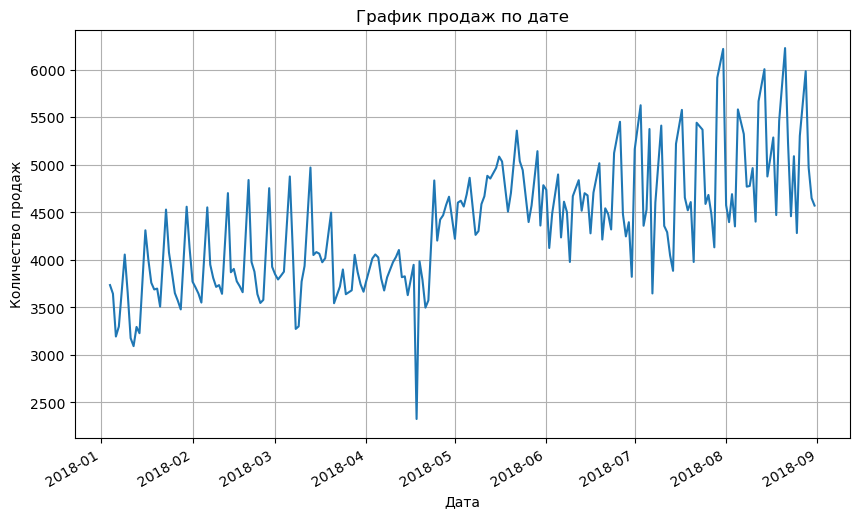

In [9]:
grouped_df.plot(figsize=(10, 6))
plt.title("График продаж по дате")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

По графику видно что постепенно количество продаж к августу увеличивалось. Спад продаж приходит на апрель-май месяцы.А вот с май-июнь низких количеств продаж было меньше.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [10]:
max_row = df[df['Количество'] == df['Количество'].max()]
print(max_row)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [11]:
df_filtered = df[(df['Склад'] == 3) & 
                 (df['Дата'].dt.month.isin([6, 7, 8])) & 
                 (df['Дата'].dt.dayofweek == 2)]

top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().idxmax()
print("Топовый товар:", top_product)

Топовый товар: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [12]:
data = pd.read_excel('data_weather1.xlsx')

In [13]:
print(data.head())

         Дата     T Unnamed: 2
0  2018-08-31   9.6        NaN
1  2018-08-31  11.3        NaN
2  2018-08-31  12.3        NaN
3  2018-08-31  13.2        NaN
4  2018-08-31  12.5        NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Дата        1918 non-null   object 
 1   T           1918 non-null   float64
 2   Unnamed: 2  93 non-null     object 
dtypes: float64(1), object(2)
memory usage: 45.1+ KB


In [15]:
data['Дата'] = pd.to_datetime(data['Дата'])

In [16]:
grouped_data = data.groupby('Дата')['T'].mean()
print(grouped_data)

Дата
2018-01-04   -13.0875
2018-01-05   -17.2500
2018-01-06   -14.1250
2018-01-07   -12.3375
2018-01-08   -15.4375
               ...   
2018-08-27    12.2250
2018-08-28    14.1000
2018-08-29    14.0375
2018-08-30    14.1625
2018-08-31    11.3875
Name: T, Length: 240, dtype: float64


In [17]:
merged_df = pd.merge(grouped_df.reset_index(), grouped_data.reset_index(), on='Дата', how='left')

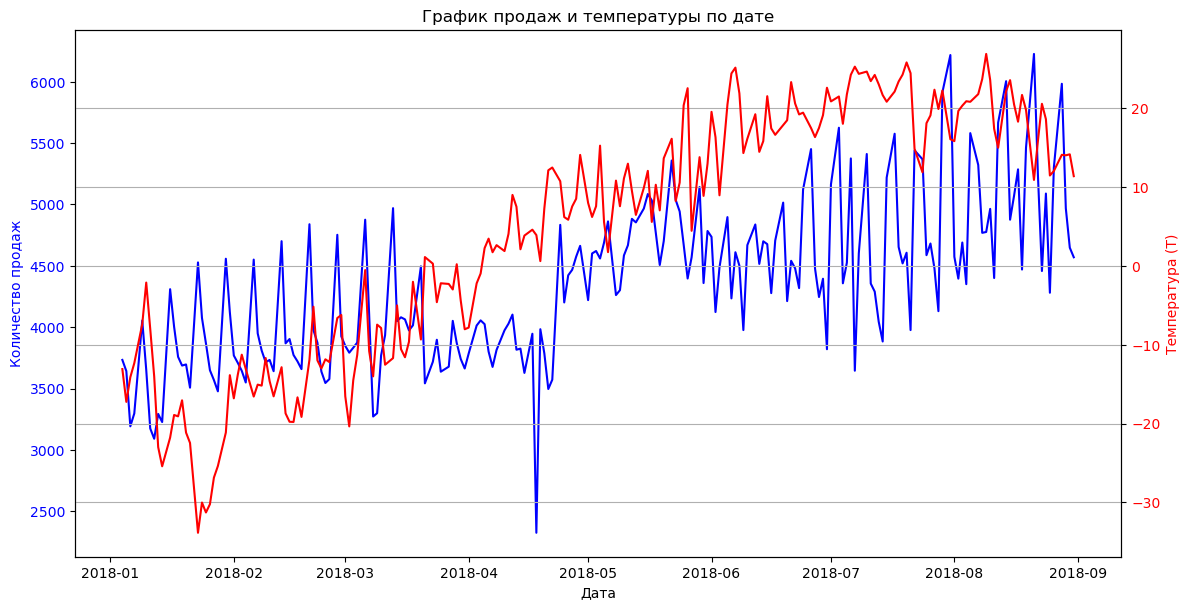

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая ось Y для количества продаж
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='b', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Вторая ось Y для температуры
ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], color='r', label='Температура (T)')
ax2.set_ylabel('Температура (T)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title("График продаж и температуры по дате")
plt.grid(True)
plt.show()

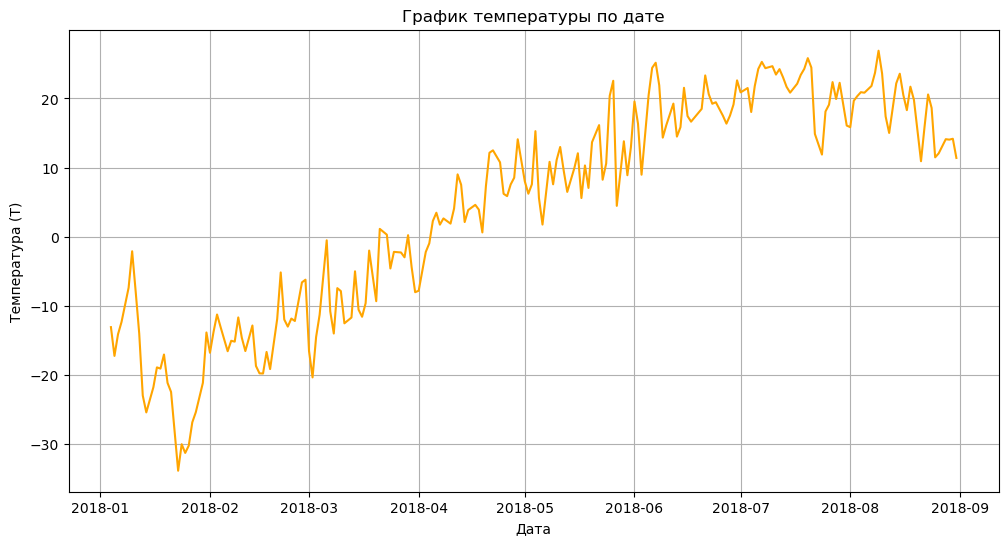

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура (T)', color='orange')

plt.title("График температуры по дате")
plt.xlabel("Дата")
plt.ylabel("Температура (T)")
plt.grid(True)
plt.show()